 ## Guía de Trabajos Prácticos 4

# **Librerías**

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


Activo mi entorno GDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Ejercicio 1:** Modelos de color y análisis


1. El archivo ‘patron.tif’ corresponde a un patrón de colores que varían por
columnas de rojo a azul. En este ejercicio se estudiaría la información que contienen las componentes de los diferentes modelos de color

- Visualice el patrón junto a las componentes [R, G, B] y [H, S, V]. Analice cómo varía la imagen en función de los valores de sus planos de color. ¿Qué información brinda cada canal?

In [3]:
def BGR_a_HSI(image):
    image = image.astype(np.float32) / 255.0
    # Obtener R, G, B
    B, G, R = cv.split(image)

    # Calcular Intensidad como promedio de R, G, y B
    I = (R + G + B) / 3.0

    # Calcular Saturación como 1 - m/I
    min_BGR = np.min([R, G, B], axis=0)
    S = 1 - (3.0 * min_BGR) / (R + G + B + 1e-6)

    # Calculas Tono
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B) * (G - B))
    theta = np.arccos(np.clip(num / (den + 1e-6), -1.0, 1.0))
    H = theta.copy()
    H[B > G] = 2 * np.pi - H[B > G]
    H = H / (2 * np.pi)

    # Combinar los canales H, S, I en una sola imagen
    hsi_image = np.zeros_like(image)
    hsi_image[:, :, 0] = H
    hsi_image[:, :, 1] = S
    hsi_image[:, :, 2] = I

    return hsi_image

In [4]:
def HSI_a_RGB(hsi_image):
    # Obtener H, S, I
    H, S, I = hsi_image[:, :, 0], hsi_image[:, :, 1], hsi_image[:, :, 2]

    rgb_image = np.zeros_like(hsi_image)
    for x in range(hsi_image.shape[0]):  # Por cada pixel
        for y in range(hsi_image.shape[1]):
            h = H[x, y] * 2 * np.pi  # Convertir H de [0, 1] a [0, 2*pi]
            s = S[x, y]
            i = I[x, y]

            if h >= 0 and h < 2 * np.pi / 3:
                b = i * (1 - s)
                r = i * (1 + (s * np.cos(h)) / np.cos(np.pi / 3 - h))
                g = 3 * i - (r + b)
            elif h >= 2 * np.pi / 3 and h < 4 * np.pi / 3:
                h = h - 2 * np.pi / 3
                r = i * (1 - s)
                g = i * (1 + (s * np.cos(h)) / np.cos(np.pi / 3 - h))
                b = 3 * i - (r + g)
            else:
                h = h - 4 * np.pi / 3
                g = i * (1 - s)
                b = i * (1 + (s * np.cos(h)) / np.cos(np.pi / 3 - h))
                r = 3 * i - (g + b)

            # Mergeo los canales calculados, clipeo a [0,1] para la salida
            rgb_image[x, y, 0] = np.clip(r, 0, 1)
            rgb_image[x, y, 1] = np.clip(g, 0, 1)
            rgb_image[x, y, 2] = np.clip(b, 0, 1)

    return rgb_image

Text(0.5, 1.0, 'Componente V')

<Figure size 640x480 with 0 Axes>

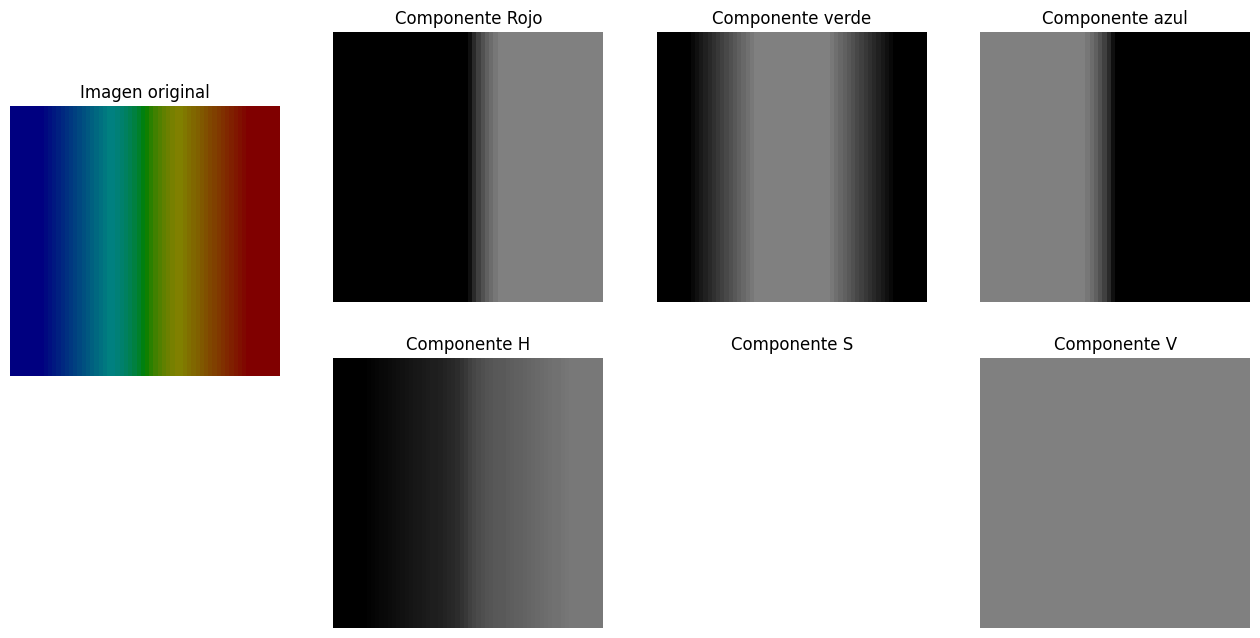

In [5]:
# Carga de imagen:
image_BGR = cv.imread("/content/drive/My Drive/PDI/patron.tif")

# Muestra de imagen original
plt.figure(1)
plt.figure(figsize=(16, 12))
plt.subplot(2, 4, 1)
plt.imshow(image_BGR)
plt.axis('off')
plt.title("Imagen original")

R, G, B = cv.split(image_BGR)

# Muestra de componentes RGB
plt.subplot(3, 4, 2)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente Rojo")

plt.subplot(3, 4, 3)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente verde")

plt.subplot(3, 4, 4)
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente azul")

image_HSV = cv.cvtColor(image_BGR, cv.COLOR_BGR2HSV)
H, S, V = cv.split(image_HSV)

# Muestra de componentes HSV
plt.subplot(3, 4, 6)
plt.imshow(H, cmap='gray',  vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente H",)

plt.subplot(3, 4, 7)
plt.imshow(S, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente S")

plt.subplot(3, 4, 8)
plt.imshow(V, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente V")

> Vemos que en el canal RGB es bastante interpretable lo que está sucediendo ya que cada canal indica cuánto de ese color está en la imágen. La imágen completa es una suma de estos degradés de cada color, del lado izquierdo está el azul que va disminuyendo hasta el centro donde está el verde, y luego empieza a aparecer el rojo. Está en gris y no en blanco la parte donde se encuentra el color ya que está un poco oscurecida la imagen.

> Por otro lado, en el canal HSV tenemos el tono que se ve como un degradé de grises (el azul es más oscuro y va aclarándose hasta el rojo), la saturación que está en blanco porque los colores están vibrantes pero el brillo que está en un gris oscuro los oscurece.

![gyuw4.png](https://omes-va.com/wp-content/uploads/2019/09/gyuw4.png)

- Modifique las componentes H, S y V de la imagen para obtener un patrón en RGB que cumpla con las siguientes condicines: variación de matices de azul a rojo y saturación y brillo máximos.

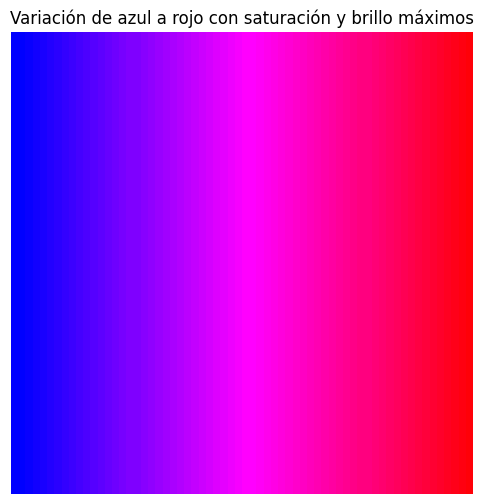

In [6]:
image_HSV_2 = image_HSV.copy()
height,width,channels = image_HSV_2.shape

# Modificar las componentes HSV para obtener el patrón deseado

for x in range(width):
    # Calcular el tono (H) en función de la posición en la imagen (de azul a rojo)
    hue = int(120 + (x / width) * 60)  # H varía de 120 (azul) a 180 (rojo)

    # Asignar el color HSV a la imagen en la posición (y, x)
    image_HSV_2[:, x] = (hue, 255, 255)

# Convertir la imagen de HSV a RGB para visualización con Matplotlib
image_BGR_2 = cv.cvtColor(image_HSV_2, cv.COLOR_HSV2BGR)
image_RGB_2 = cv.cvtColor(image_BGR_2, cv.COLOR_BGR2RGB)

# Mostrar la imagen resultante
plt.figure(figsize=(6, 6))
plt.imshow(image_RGB_2, vmin=0, vmax=255)
plt.axis('off')
plt.title('Variación de azul a rojo con saturación y brillo máximos')
plt.show()

La componente H en HSV está asociada con un círculo cromático, donde los valores de H varían de 0 a 179 grados en OpenCV. En este círculo cromático:

- H = 0 corresponde al color rojo.
- H = 30 corresponde al color amarillo.
- H = 60 corresponde al color verde.
- H = 90 corresponde al color cian.
- H = 120 corresponde al color azul.
- H = 150 corresponde al color magenta/rosado.
- H = 180 corresponde al color rojo de nuevo (es un círculo).

Entonces para ir de azul a rojo mapeamos los colores para que vayan de 120 a 180. Por ejemplo, si quisiéramos ir de rojo a verde sería de 0 a 60 y de verde a azul sería 60 a 120.



<Figure size 640x480 with 0 Axes>

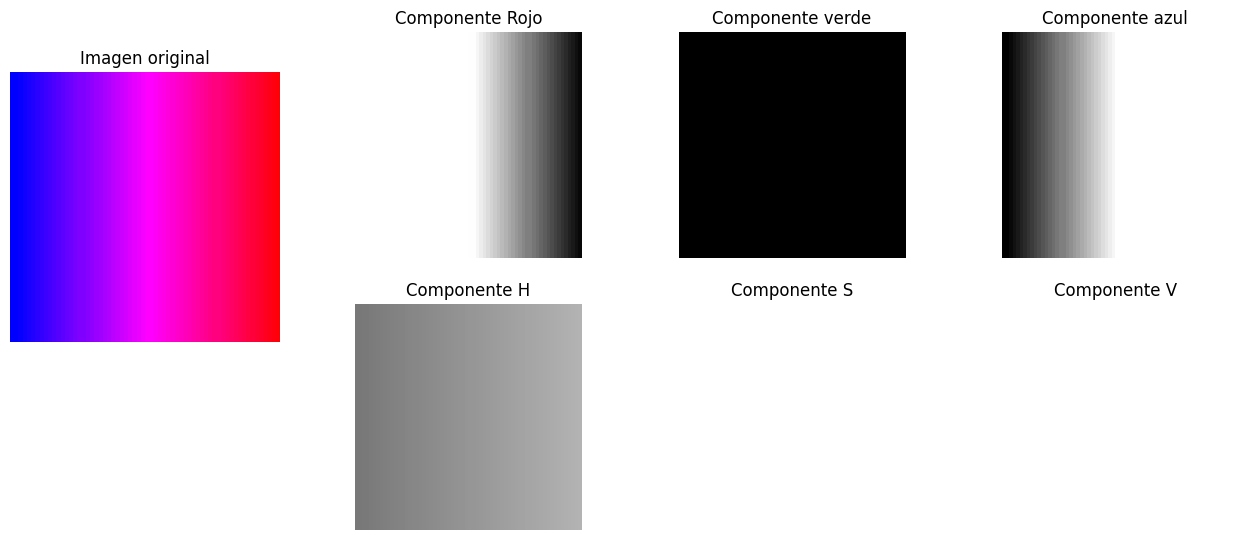

In [7]:
# Muestra de imagen original
plt.figure(1)
plt.figure(figsize=(16, 10))
plt.subplot(2, 4, 1)
plt.imshow(image_RGB_2)
plt.axis('off')
plt.title("Imagen original")

# Muestra de componentes RGB
R, G, B = cv.split(image_BGR_2)

plt.subplot(3, 4, 2)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente Rojo")

plt.subplot(3, 4, 3)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente verde")

plt.subplot(3, 4, 4)
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente azul")

# Muestra de componentes HSV
H, S, V = cv.split(image_HSV_2)

plt.subplot(3, 4, 6)
plt.imshow(H, cmap='gray',  vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente H",)

plt.subplot(3, 4, 7)
plt.imshow(S, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente S")

plt.subplot(3, 4, 8)
plt.imshow(V, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Componente V")

plt.show()

> Vemos que el canal verde está negro porque tiene valor 0 en toda la imágen. Mientras que el canal rojo y el azul están en degradé en sus respectivos lados de la imagen.

> En cuanto al HSV, las componentes están en blanco porque tienen el valor 255, mientras que la componente H muestra un degradé de grises más oscuros porque van de 120 a 180 para representar el azul y el rojo.

- Genere una función cuyo resultado sea una imagen donde los pixeles tengan los
colores complementarios a los de la original. Utilice las componentes del modelo
HSV y la imagen ‘rosas.jpg’.


In [8]:
def complemento_color(img_original):
    # Convertir la imagen a HSV
    img_hsv = cv.cvtColor(img_original, cv.COLOR_BGR2HSV)

    # Copiar la imagen original
    img_complemento = img_hsv.copy()

    # Calcular el complemento del color para cada píxel
    H, S, V = cv.split(img_complemento)

    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            H[i,j] = (H[i,j] + 90)%180

    # Convertir la imagen de vuelta a RGB para visualización
    img_complemento = cv.merge([H,S,V])
    img_complemento_RGB = cv.cvtColor(img_complemento, cv.COLOR_HSV2RGB)

    return img_complemento_RGB

<Figure size 640x480 with 0 Axes>

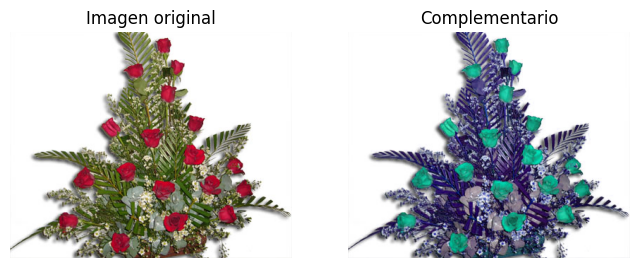

In [9]:
# Carga de imagen:
image_BGR = cv.imread("/content/drive/My Drive/PDI/rosas.jpg")
image_complement = complemento_color(image_BGR)

# Muestra de imagen original
plt.figure(1)
plt.figure(figsize=(8,10))
plt.subplot(1, 2, 1)
plt.imshow(image_BGR[:,:,[2,1,0]], vmin=0, vmax=255)
plt.axis('off')
plt.title("Imagen original")

# Muestra de imagen con colores complementarios
plt.subplot(1, 2, 2)
plt.imshow(image_complement, vmin=0, vmax=255)
plt.axis('off')
plt.title("Complementario")

plt.show()

- Mejore la función para trazar los perfiles de intensidad que realizó en guías
previas, para que en la misma gráfica.

  se visualicen simultáneamente los perfiles de cada canal: R, G y B.

  se visualicen los perfiles de los canales H, S y V.



In [10]:
def perfilesRGB(img,fila):
    imgHSV = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    HSV = cv.split(imgHSV)

    img_line=img.copy()
    img_line[fila,:]=0

    fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(10,5))
    ax[0,0].set_title('Imagen')
    ax[0,0].imshow(img_line[:,:,[2,1,0]]) # invierto canales para que sea RGB en vez de BGR
    ax[1,0].axis('off')

    # Perfiles RGB
    ax[0,1].plot(img[fila,:,2])
    ax[0,1].set_title("Perfil rojo")
    ax[0,2].plot(img[fila,:,1])
    ax[0,2].set_title("Perfil verde")
    ax[0,3].plot(img[fila,:,0])
    ax[0,3].set_title("Perfil azul")

    # Perfiles HSV
    ax[1,1].plot(HSV[0][fila,:])
    ax[1,1].set_title("Perfil tono")
    ax[1,2].plot(HSV[1][fila,:])
    ax[1,2].set_title("Perfil saturación")
    ax[1,3].plot(HSV[2][fila,:])
    ax[1,3].set_title("Perfil valor")

    plt.tight_layout()
    plt.show()

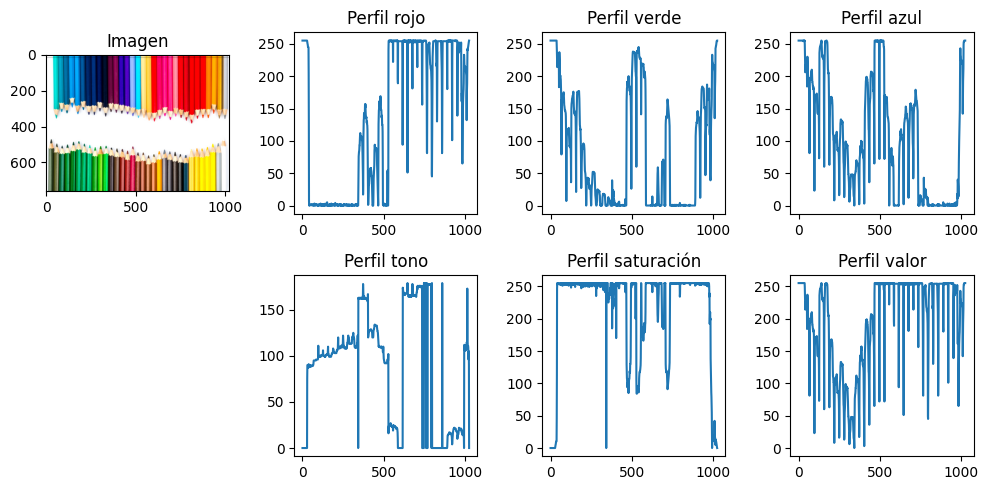

In [11]:
# Carga de imagen en formato BGR
image_BGR = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg")
perfilesRGB(img=image_BGR,fila=20)

## **Ejercicio 2:** Procesamiento de imágenes en pseudocolor

1. Habitualmente las imágenes que se relevan en partes no visibles del espectro
(como las de infrarrojos, radar, etc.) se encuentran en escala de grises. Para
resaltar zonas de interés, se pueden asignar colores a rangos específicos de intensidades

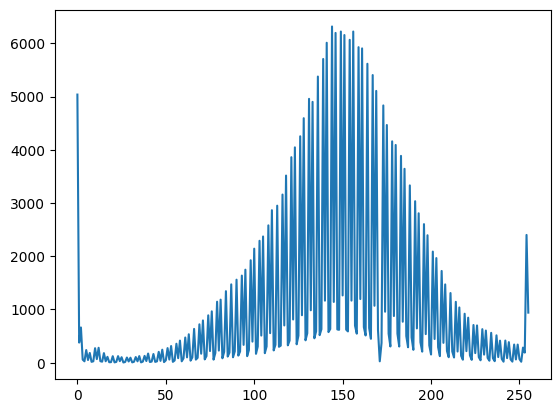

In [12]:
# CARGO IMAGEN:
rio = cv.imread("/content/drive/My Drive/PDI/rio.jpg",cv.IMREAD_GRAYSCALE)
rio_histo = cv.calcHist([rio],[0],None,[256],[0,256])

plt.figure()
plt.plot(rio_histo)
plt.show()

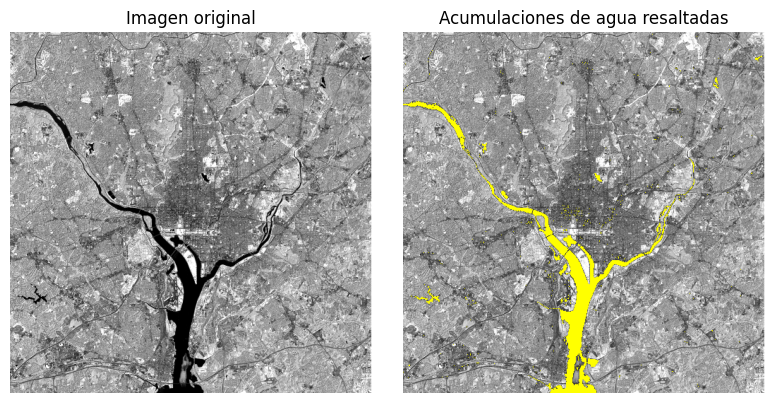

In [13]:
# Tras observar el histograma, determinamos rango para diferenciar el agua de lo demás:
# Empezamos con 20 pero fuimos subiendo hasta 40 para tener un resultado más lindo.
rango = 40

# Obtengo los tres canales como copias de la imagen, después las modifico en las zonas de interés.
R = rio.copy()
G = rio.copy()
B = rio.copy()

for i in range(rio.shape[0]): # busco pixel a pixel
  for j in range(rio.shape[1]):
    if rio[i,j] < rango:  # si estoy en el rango de grises para el agua (lo suficientemente oscuro)
      R[i,j] = 255   # posición i,j del canal rojo 255 -> como queremos amarillo, sumamos todo el rojo y todo el verde, nada de azul.
      G[i,j] = 255   # posición i,j del canal verde 255
      B[i,j] = 0     # posición i,j del canal azul 0

rio_RGB = cv.merge([R,G,B])
rio_RGB_histo = cv.calcHist([rio_RGB],[0],None,[256],[0,256])

fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].set_title('Imagen original')
ax[0].imshow(rio,cmap="gray",vmin=0,vmax=255)
ax[0].axis('off')
ax[1].set_title('Acumulaciones de agua resaltadas')
ax[1].imshow(rio_RGB,vmin=0,vmax=255)
ax[1].axis('off')
plt.tight_layout()
plt.show()

## **Ejercicio 3:** Procesamiento de imágenes en color

1. Manejo de histograma: la imagen ‘chairs oscura.jpg’ posee poca luminosidad. Usted debe mejorar la imagen a partir de la ecualizaci´on de histograma,
comparando los efectos de realizarla en RGB (por planos), en HSV (canal V) y
en HSI (canal I).

In [14]:
def ecualizacion_RGB(imagen): # recibe imagen en bgr
  imagen_RGB = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
  r, g, b = cv.split(imagen_RGB)             # obtengo canales por separado
  r_eq = cv.equalizeHist(r)                  # histogramas de cada canal
  g_eq = cv.equalizeHist(g)
  b_eq = cv.equalizeHist(b)
  imagen_eq = cv.merge([r_eq, g_eq, b_eq])   # mergeo histogramas en la imagen
  return imagen_eq  # retorna imagen en rgb

def ecualizacion_HSV(imagen): # recibe imagen en bgr
  imagen_HSV = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)
  h, s, v = cv.split(imagen_HSV)            # obtengo canales por separado
  v_eq = cv.equalizeHist(v)                 # ecualizo histograma en V
  imagen_eq = cv.merge([h,s,v_eq])          # mergeo los valores orignales de h y s con el histograma de v ecualizado.
  imagen_eq_rgb = cv.cvtColor(imagen_eq, cv.COLOR_HSV2RGB)   # retorna imagen en rgb
  return imagen_eq_rgb

def ecualizacion_HSI(imagen): # recibe imagen en bgr
  imagen_HSI = BGR_a_HSI(imagen)
  h, s, i = cv.split(imagen_HSI)        # obtengo canales por separado
  i_uint8 = (i * 255).astype(np.uint8)
  i_eq = cv.equalizeHist(i_uint8)       # ecualizo I
  i_eq = i_eq.astype(np.float32) / 255.0
  imagen_eq = cv.merge([h,s,i_eq])      # mergeo los valores orignales de h y s con el histograma de i ecualizado.
  imagen_eq_rgb = HSI_a_RGB(imagen_eq)
  return imagen_eq_rgb  # retorna imagen en rgb

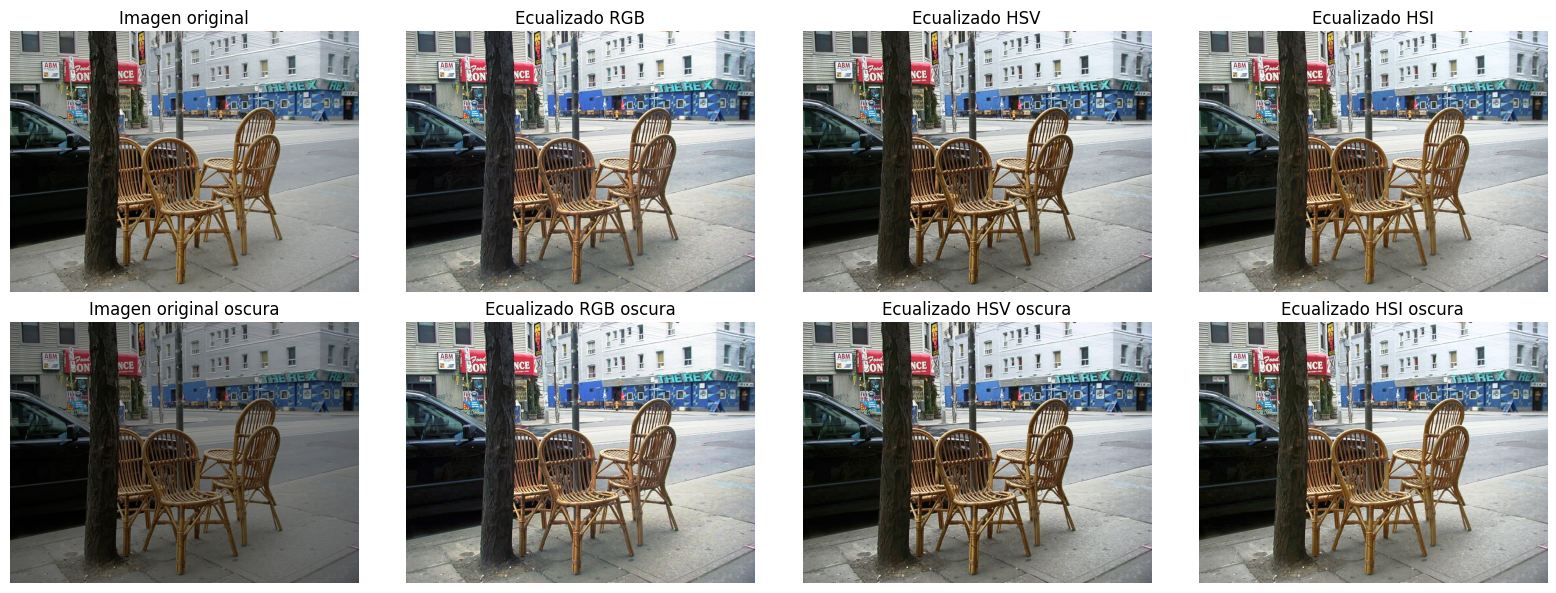

In [15]:
# Carga de imagen:
chairs_oscura_BGR = cv.imread("/content/drive/My Drive/PDI/chairs_oscura.jpg")
chairs_BGR = cv.imread("/content/drive/My Drive/PDI/chairs.jpg")

chairs_oscura_RGB = cv.cvtColor(chairs_oscura_BGR, cv.COLOR_BGR2RGB)
chairs_RGB = cv.cvtColor(chairs_BGR, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(2,4, figsize=(16,6))

ax[0,0].set_title('Imagen original')
ax[0,0].axis('off')
ax[0,0].imshow(chairs_RGB, vmin=0, vmax=255)
ax[1,0].set_title('Imagen original oscura')
ax[1,0].axis('off')
ax[1,0].imshow(chairs_oscura_RGB, vmin=0, vmax=255)

# Ecualización por planos RGB
chairs_eq_RGB = ecualizacion_RGB(chairs_BGR)
ax[0,1].set_title('Ecualizado RGB')
ax[0,1].axis('off')
ax[0,1].imshow(chairs_eq_RGB, vmin=0, vmax=255)
chairs_oscura_eq_RGB = ecualizacion_RGB(chairs_oscura_BGR)
ax[1,1].set_title('Ecualizado RGB oscura')
ax[1,1].axis('off')
ax[1,1].imshow(chairs_oscura_eq_RGB, vmin=0, vmax=255)

# Ecualización en canal V de HSV
chairs_eq_HSV = ecualizacion_HSV(chairs_BGR)
ax[0,2].set_title('Ecualizado HSV')
ax[0,2].axis('off')
ax[0,2].imshow(chairs_eq_HSV, vmin=0, vmax=255)
chairs_oscura_eq_HSV = ecualizacion_HSV(chairs_oscura_BGR)
ax[1,2].set_title('Ecualizado HSV oscura')
ax[1,2].axis('off')
ax[1,2].imshow(chairs_oscura_eq_HSV, vmin=0, vmax=255)

# Ecualización en canal I de HSI
chairs_eq_HSI = ecualizacion_HSI(chairs_BGR)
ax[0,3].set_title('Ecualizado HSI')
ax[0,3].axis('off')
ax[0,3].imshow(chairs_eq_HSI, vmin=0, vmax=255)
chairs_oscura_eq_HSI = ecualizacion_HSI(chairs_oscura_BGR)
ax[1,3].set_title('Ecualizado HSI oscura')
ax[1,3].axis('off')
ax[1,3].imshow(chairs_oscura_eq_HSI, vmin=0, vmax=255)

plt.tight_layout()
plt.show()

> Podemos visualizar como en los tres casos se obtiene una imágen mejor en comparación a la de entrada, con más contraste y sus características realzadas. Sin embargo, se destaca que en el caso de la ecualización RGB hay cambios en los colores, aunque ligeros para esta imagen, que se obtienen como efecto secundario de la ecualización. Por ejemplo, las paredes pintadas de azul tienen un color distinto que la imagen original y las ecualizadas por HSV y HSI, un poco más tirando a violeta que el original.

> Para esta imagen, el resultado de la ecualización por HSV y HSI no muestra tantas diferencias. Se puede ver que el HSI logra una mejor luminosidad pero parece no conservar tanto el contraste, mientras que el HSV tiene un mejor contraste.

> Comparando los resultados de los histogramas de la imagen original y la oscurecida, podemos decir que son casi iguales salvo por detalles mínimos.

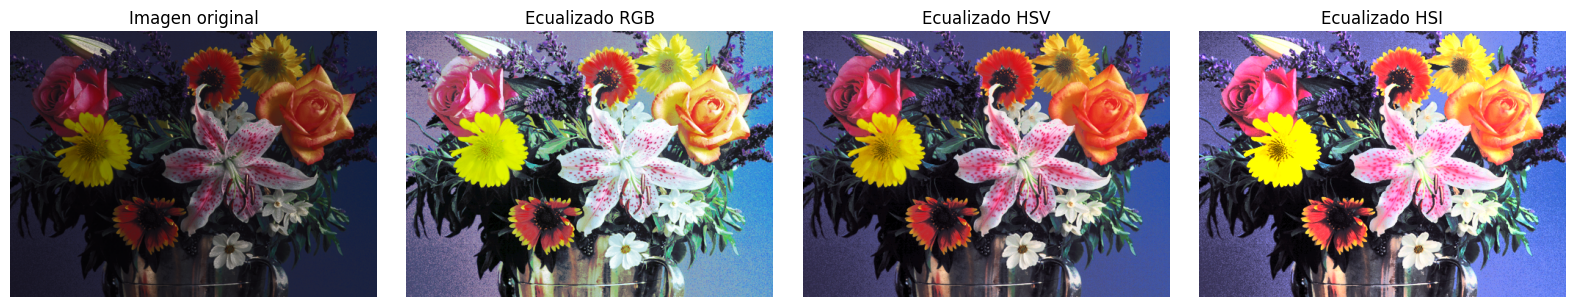

In [16]:
# Carga de imagen:
flowers_BGR = cv.imread("/content/drive/My Drive/PDI/flowers_oscura.tif")
flowers_RGB = cv.cvtColor(flowers_BGR, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,4, figsize=(16,3))

ax[0].set_title('Imagen original')
ax[0].axis('off')
ax[0].imshow(flowers_RGB, vmin=0, vmax=255)

# Ecualización por planos RGB
flowers_eq_RGB = ecualizacion_RGB(flowers_BGR)
ax[1].set_title('Ecualizado RGB')
ax[1].axis('off')
ax[1].imshow(flowers_eq_RGB, vmin=0, vmax=255)

# Ecualización en canal V de HSV
flowers_eq_HSV = ecualizacion_HSV(flowers_BGR)
ax[2].set_title('Ecualizado HSV')
ax[2].axis('off')
ax[2].imshow(flowers_eq_HSV, vmin=0, vmax=255)

# Ecualización en canal I de HSI
flowers_eq_HSI = ecualizacion_HSI(flowers_BGR)
ax[3].set_title('Ecualizado HSI')
ax[3].axis('off')
ax[3].imshow(flowers_eq_HSI, vmin=0, vmax=255)

plt.tight_layout()
plt.show()

> Para este caso, vemos diferencias drásticas entre las tres ecualizaciones. En primer lugar, el ecualizado en RGB muestra cambios importantes en los colores de la imágen. Si bien son colores parecidos, pierde detalles de las flores al aclarar algunos detalles (como la flor blanca que sólo conservó los puntos rojos y no el rojo del pétalo).

> En cuanto al HSV contra el HSI, vemos que el HSI logró una mejor iluminación de la imágen pero quedó mucho más iluminada y no tan buen contraste, lo cual sí se logró con el HSV que tuvo el mejor resultado.

2. Realce mediante acentuado: utilice la imagen ‘camino.tif’ que se observa desenfocada. Usted debe mejorar la imagen aplicando un filtro pasa altos de suma 1. Compare los resultados de procesar la imagen en los modelos RGB, HSV y
HSI.

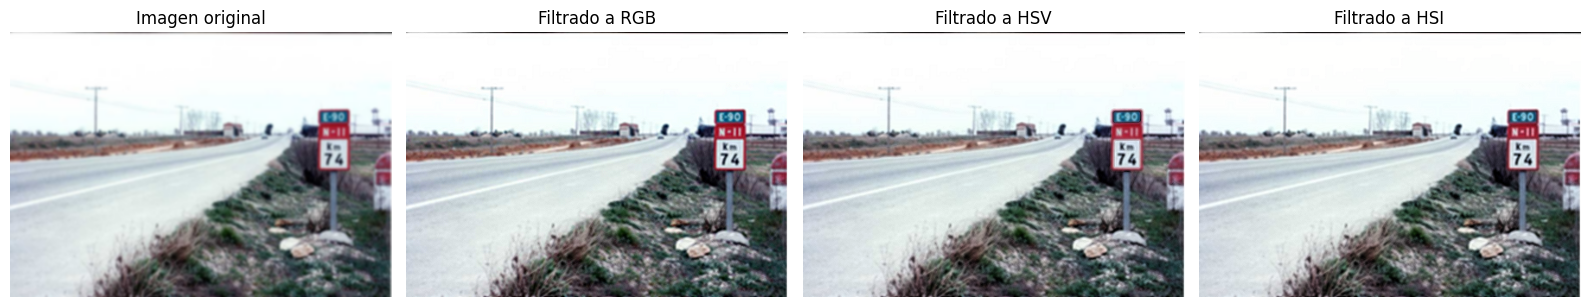

In [17]:
# Carga de imagen:
image = cv.imread('/content/drive/My Drive/PDI/camino.tif', cv.IMREAD_COLOR)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,4, figsize=(16,3))
ax[0].set_title('Imagen original')
ax[0].axis('off')
ax[0].imshow(image_rgb, vmin=0, vmax=255)

# DISEÑO MI FILTRO:
kernel = np.array([[0, -1, 0],
                   [-1,  5, -1],
                   [0, -1, 0]])

# Aplico filtro a canáles RGB:
r_filtered = cv.filter2D(image_rgb[:,:,0], -1, kernel)                           # aplico filtro al rojo
g_filtered = cv.filter2D(image_rgb[:,:,1], -1, kernel)                           # aplico filtro al verde
b_filtered = cv.filter2D(image_rgb[:,:,2], -1, kernel)                           # aplico filtro al azul
filtered_image_rgb = cv.merge([r_filtered, g_filtered, b_filtered])              # junto rgb filtrados
ax[1].set_title('Filtrado a RGB')
ax[1].axis('off')
ax[1].imshow(filtered_image_rgb, vmin=0, vmax=255)

# Aplico filtro a canal V de HSV:
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
v = image_hsv[:,:,2]                                                              # obtengo canal V separado
v_filtered = cv.filter2D(v,-1,kernel)                                             # aplico filtro a V
filtered_image_hsv = cv.merge([image_hsv[:,:,0],image_hsv[:,:,1],v_filtered])     # junto H,S con V filtrada
filtered_image_hsv_rgb = cv.cvtColor(filtered_image_hsv,cv.COLOR_HSV2RGB)         # cambio a rgb para plotear
ax[2].set_title('Filtrado a HSV')
ax[2].axis('off')
ax[2].imshow(filtered_image_hsv_rgb, vmin=0, vmax=255)

# Aplico filtro a canal I de HSI:
image_hsi = BGR_a_HSI(image)
i = image_hsi[:,:,2]                                                              # obtengo canal I separado
i_filtered = cv.filter2D(i,-1,kernel)                                             # aplico filtro a I
filtered_image_hsi = cv.merge([image_hsi[:,:,0], image_hsi[:,:,1], i_filtered])   # junto H,S con I filtrada
filtered_image_hsi_rgb = HSI_a_RGB(filtered_image_hsi)                            # cambio a rgb para plotear
ax[3].set_title('Filtrado a HSI')
ax[3].axis('off')
ax[3].imshow(filtered_image_hsi_rgb, vmin=0, vmax=255)

plt.tight_layout()
plt.show()

> El filtrado en los canales RGB puede producir resultados más intensos en términos de contraste y detalles, pero puede afectar los colores.

> El filtrado en HSV preserva mejor los colores mientras realza la luminosidad y los detalles de alta frecuencia. El HSI produce un efecto similar pero con mejor contraste.

> Para esta imagen se ve un mejor contraste de los rojos fuertes y el azul del cartel en el filtado RGB, no se aprecia ningún cambio de color importante pero puede suceder al tratar con estos canales. El HSV no obtuvo el mejor contraste en la parte de color del cartel, mientras que el HSI logró un buen trabajo en esto manteniendo los colores de la imagen intactos.

## **Ejercicio 4:** Segmentación basada en color

Para los próximos ejercicios utilizamos las siguientes funciones que son para segmentación RGB y HSV. Con esto obtenemos automáticamente el valor máximo del histograma de la ROI en sus distintos canales, pero podría tratarse el problema analizando el histograma a mano para determinar el centro del círculo o del rectángulo. El radio se maneja por parámetros y podría ser útil implementar una barra deslizante para ver cómo varía el resultado con distintos valores de R, deltaS y deltaH.

In [18]:
def segmentacion_rgb(img,roi,R):
    # obtenemos información de la roi para generar máscara
    BGR_roi = cv.split(roi)
    maxB = np.argmax(np.histogram(BGR_roi[0],np.arange(256))[0])  # obtenemos valor más frecuente de rojo
    maxG = np.argmax(np.histogram(BGR_roi[1],np.arange(256))[0])  # valor más frecuente de verde
    maxR = np.argmax(np.histogram(BGR_roi[2],np.arange(256))[0])  # valor más frecuente de azul

    # generar máscara:
    H,W,_ = img.shape
    maskBGR = np.zeros((H,W),np.uint8)

    for i in range(H):  # recorremos píxel a píxel
        for j in range(W):
            if ((maxB - img[i][j][0])**2 + (maxG - img[i][j][1])**2 + (maxR - img[i][j][2])**2) <= R**2: # si los valores de rojo, verde y azul del píxel i,j
                                                                                                         # tienen una distancia euclidea menor a R con los
                                                                                                         # valores más frecuentes de la ROI, me interesa.
                maskBGR[i][j]=255 # le pongo valor 255 a la máscara en ese píxel, si no entra acá ese píxel queda en 0 y va a descartarlo cunado aplique la máscara.
    return maskBGR

def segmentacion_hsv(img,roi,deltaH,deltaS):
    # obtenemos los canales de la imagen y de la ROI.
    HSV = cv.split(cv.cvtColor(roi, cv.COLOR_BGR2HSV))
    HSV_img = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))

    # buscamos pico del histograma (valor más frecuente) para los dos canales
    maxH = np.argmax(np.histogram(HSV[0],np.arange(256))[0])
    maxS = np.argmax(np.histogram(HSV[1],np.arange(256))[0])

    # generar máscara:
    H,W,_ = img.shape
    maskHSV = np.zeros((H,W),np.uint8)

    for i in np.arange(H):  # recorremos píxel a píxel
        for j in np.arange(W):
            # hacemos 1 en la máscara sólo a los píxeles cuyos valores de H y S están dentro del rectángulo definido por los límites:
            # (maxH - deltaH, maxH + deltaH) en una dimensión correspondiente al hue o tono
            # (maxS - deltaS, maxS + deltaS) en la otra dimensión correspondiente a la saturación
            if (HSV_img[0][i,j] >= maxH-deltaH) and (HSV_img[0][i,j] <= maxH+deltaH) and (HSV_img[1][i,j] >=maxS-deltaS) and (HSV_img[1][i,j] <=maxS+deltaS):
                maskHSV[i,j] = 255
    return maskHSV

Este proceso permite separar la imagen en regiones utilizando información del color.
En este ejercicio usted debe implementar la segmentación de imágenes para los modelos de color RGB y HSV. En cada caso debería determinar el subespacio a segmentar para generar una máscara, que luego utilizará para extraer sólo la información de interés de la imagen original.

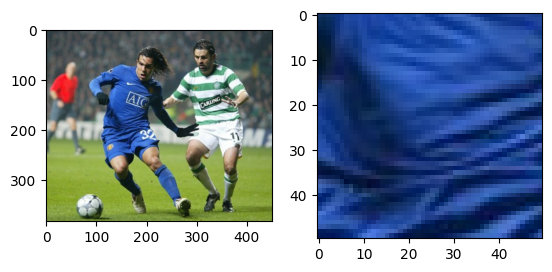

In [19]:
futbol = cv.imread('/content/drive/My Drive/PDI/futbol.jpg')
roi = futbol[160:210,130:180] # tomo mi region de interés representativa que es la que tiene el color de la remera del jugador de la izquierda

fig, ax = plt.subplots(1,2)
ax[0].imshow(futbol[:,:,[2,1,0]])
ax[1].imshow(roi[:,:,[2,1,0]])
plt.show()

Para utilizar las funciones vamos variando los parámetros hasta conseguir un resultado deseable.

> En el caso de la segmentación RGB vamos variando hasta tomar la cantidad deseada de tonos azules. Un radio muy chico puede hacer que no tomemos todo el uniforme del jugador y un radio muy grande puede empezar a tomar otras partes de la imagen que no nos interesan. Es destacable notar que puede variar mucho entre un radio de 90 y un radio de 100.

En el caso de la segmentación HSV vamos analizando lo mismo pero con los dos rangos cambiando los delta, ya que ahora tenemos dos que me determinan la máscara.

> Si ponemos un deltaS muy chico toma las partes de azul más claritas y no tanto las oscuras, si ponemos un deltaS muy grande toma toda la silueta pero también los azules más grisaceos que se ven en la audiencia o en el short del árbitro.

> Si ponemos un deltaH muy chico puede no tomar todos los distintos tonos de azul del uniforme pero debe ser muy chico (deltaH = 1) para hacer un cambio notable. Si ponemos un deltaH muy grande empieza a captar otros colores como las rayas verde del uniforme del otro jugador, ya con deltaH = 30 lo empezamos a notar.


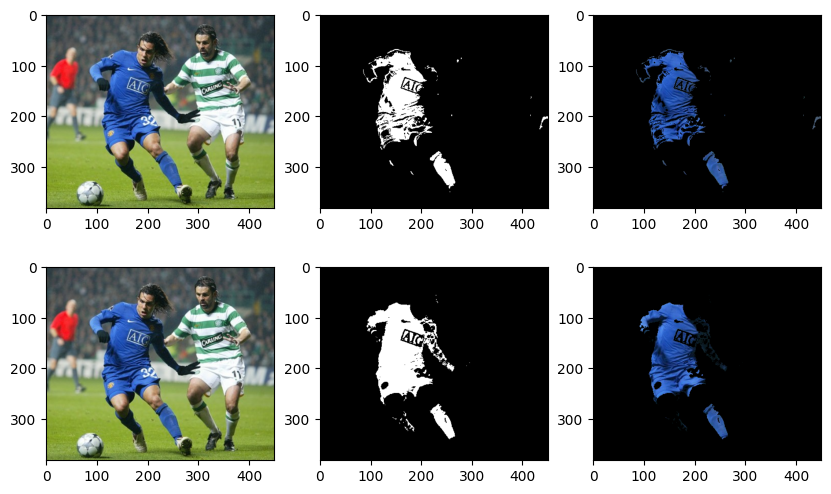

In [20]:
# Segmentación RGB:
maskBGR = segmentacion_rgb(futbol,roi,R=93)
futbol_segm_bgr = cv.bitwise_and(futbol,futbol,mask=maskBGR)

# Segmentación HSV:
maskHSV = segmentacion_hsv(futbol,roi,deltaH=18,deltaS=105)
futbol_segm_hsv = cv.bitwise_and(futbol,futbol,mask=maskHSV)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
ax[0,0].imshow(futbol[:,:,[2,1,0]])
ax[0,1].imshow(maskBGR,cmap="gray",vmin=0,vmax=255)
ax[0,2].imshow(futbol_segm_bgr[:,:,[2,1,0]])
ax[1,0].imshow(futbol[:,:,[2,1,0]])
ax[1,1].imshow(maskHSV,cmap="gray",vmin=0,vmax=255)
ax[1,2].imshow(futbol_segm_hsv[:,:,[2,1,0]])
plt.show()

El resultado fue mucho mejor con la segmentación HSV ya que captó mejor el uniforme con la máscara, logrando obtener las partes más iluminadas y las más oscurecidas, y no tuvo tanto ruido como el RGB. También hay una dependencia en los resultados de qué ROI sacamos, pero el método por HSV también ofrece parámetros más ajustables, con más posibilidades de definir ajustes en base a otros criterios que no sean el color. Por último, notamos que al cambiar un poco la ROI (por ejemplo, en vez de [160:200,130:170] tomamos [160:190,130:160] el resultado de la segmentación RGB varía muchísimo, se rompe, mientras que la de HSV se mantiene casi igual sin reajustar los parámetros deltaS, deltaH.

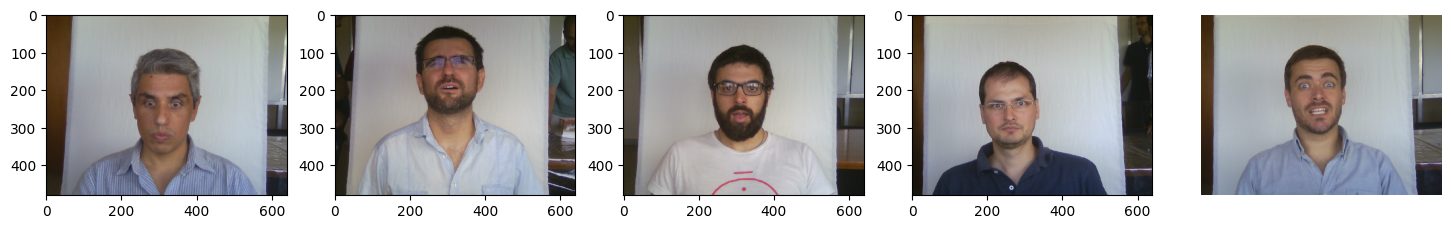

In [21]:
cara1 = cv.imread('/content/drive/My Drive/PDI/s01_i08_H_CM.png')
cara2 = cv.imread('/content/drive/My Drive/PDI/s03_i10_H_DM.png')
cara3 = cv.imread('/content/drive/My Drive/PDI/s05_i08_H_LB.png')
cara4 = cv.imread('/content/drive/My Drive/PDI/s06_i13_H_LV.png')
cara5 = cv.imread('/content/drive/My Drive/PDI/s08_i06_H_MA.png')

fig,ax = plt.subplots(1,5,figsize=(18,18))
ax[0].imshow(cara1[:,:,[2,1,0]],vmin=0,vmax=255)
ax[1].imshow(cara2[:,:,[2,1,0]],vmin=0,vmax=255)
ax[2].imshow(cara3[:,:,[2,1,0]],vmin=0,vmax=255)
ax[3].imshow(cara4[:,:,[2,1,0]],vmin=0,vmax=255)
ax[4].imshow(cara5[:,:,[2,1,0]],vmin=0,vmax=255)
ax[4].axis('off')
plt.show()

Analizando las imágenes y los ejes, obtenemos las ROI para cada cara y aplicamos ambas segmentaciones para cada caso.

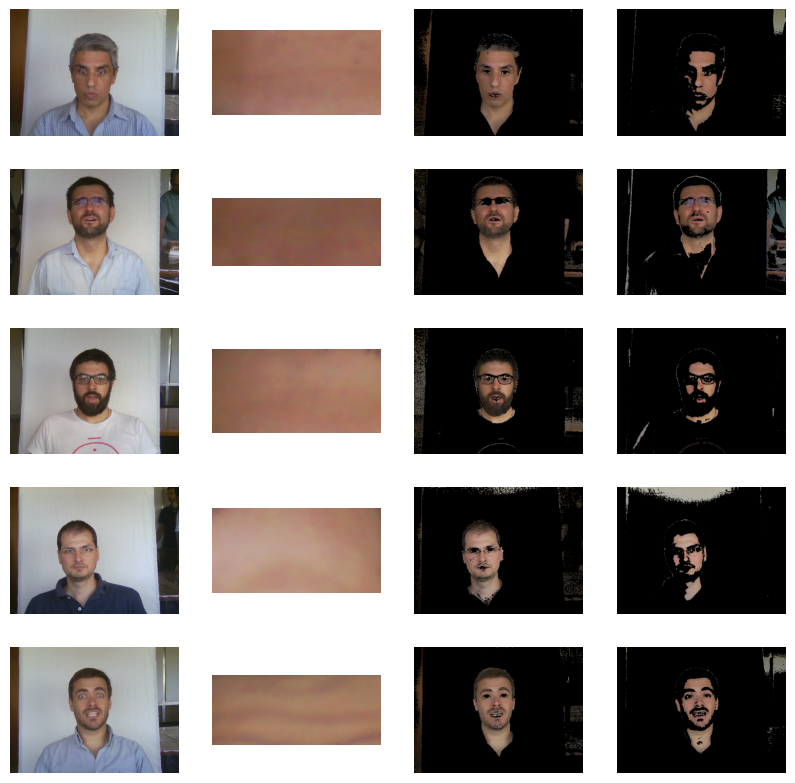

In [22]:
roi_cara1 = cara1[180:210,270:330]
roi_cara2 = cara2[85:105,270:320]
roi_cara3 = cara3[140:170,270:330]
roi_cara4 = cara4[180:210,250:310]
roi_cara5 = cara5[125:150,270:330]

# Segmentación HSV:
segm_hsv_cara1 = cv.bitwise_and(cara1,cara1,mask=segmentacion_hsv(cara1,roi_cara1,12,70))
segm_hsv_cara2 = cv.bitwise_and(cara2,cara2,mask=segmentacion_hsv(cara2,roi_cara2,12,70))
segm_hsv_cara3 = cv.bitwise_and(cara3,cara3,mask=segmentacion_hsv(cara3,roi_cara3,12,70))
segm_hsv_cara4 = cv.bitwise_and(cara4,cara4,mask=segmentacion_hsv(cara4,roi_cara4,10,65))
segm_hsv_cara5 = cv.bitwise_and(cara5,cara5,mask=segmentacion_hsv(cara5,roi_cara5,12,70))

# Segmentación BGR:
segm_rgb_cara1 = cv.bitwise_and(cara1,cara1,mask=segmentacion_rgb(cara1,roi_cara1,50))
segm_rgb_cara2 = cv.bitwise_and(cara2,cara2,mask=segmentacion_rgb(cara2,roi_cara2,75))
segm_rgb_cara3 = cv.bitwise_and(cara3,cara3,mask=segmentacion_rgb(cara3,roi_cara3,50))
segm_rgb_cara4 = cv.bitwise_and(cara4,cara4,mask=segmentacion_rgb(cara4,roi_cara4,50))
segm_rgb_cara5 = cv.bitwise_and(cara5,cara5,mask=segmentacion_rgb(cara5,roi_cara5,50))

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(10,10))

ax[0,0].imshow(cara1[:,:,[2,1,0]])
ax[0,1].imshow(roi_cara1[:,:,[2,1,0]])
ax[0,2].imshow(segm_hsv_cara1[:,:,[2,1,0]])
ax[0,3].imshow(segm_rgb_cara1[:,:,[2,1,0]])

ax[1,0].imshow(cara2[:,:,[2,1,0]])
ax[1,1].imshow(roi_cara2[:,:,[2,1,0]])
ax[1,2].imshow(segm_hsv_cara2[:,:,[2,1,0]])
ax[1,3].imshow(segm_rgb_cara2[:,:,[2,1,0]])

ax[2,0].imshow(cara3[:,:,[2,1,0]])
ax[2,1].imshow(roi_cara3[:,:,[2,1,0]])
ax[2,2].imshow(segm_hsv_cara3[:,:,[2,1,0]])
ax[2,3].imshow(segm_rgb_cara3[:,:,[2,1,0]])

ax[3,0].imshow(cara4[:,:,[2,1,0]])
ax[3,1].imshow(roi_cara4[:,:,[2,1,0]])
ax[3,2].imshow(segm_hsv_cara4[:,:,[2,1,0]])
ax[3,3].imshow(segm_rgb_cara4[:,:,[2,1,0]])

ax[4,0].imshow(cara5[:,:,[2,1,0]])
ax[4,1].imshow(roi_cara5[:,:,[2,1,0]])
ax[4,2].imshow(segm_hsv_cara5[:,:,[2,1,0]])
ax[4,3].imshow(segm_rgb_cara5[:,:,[2,1,0]])

for i in range(5):
  for j in range(4):
    ax[i,j].axis('off')
plt.show()

> El método por HSV es más flexible en cuanto a las modificaciones que le podemos hacer para tomar ciertas cosas y otras no.

> No es posible obtener un conjunto de valores óptimo para todas las imágenes. Cada una tiene sus particularidades al tratarse de personas distintas. En general tienen valores similares pero necesitamos hacer ciertos retoques para arreglar algunas cosas. Por ejemplo:
- Para la cara2, el cuello y la cara tienen colores bastante distintos (el cuello es mucho más clarito), eso hace que en el RGB no se muestre tan fácilmente sin empezar a mostrar cosas del fondo. En el HSV esto se resuelve admitiendo un rango más amplio de valor. También se podría resolver aplicando dos segmentaciones tal vez.
- Para la cara4, ya que la persona tiene la piel más blanca que los demás, debemos hacer disminuir los deltas, ya que empieza a tomar la pared. Esto con el RGB no es tan fácil de corregir porque dejo de tomar la cara.

> Aplicar sin métodos de pre-procesamiento tiene un resultado decente pero seguramente sea mucho mejor utilizándolos.

> Los mayores inconvenientes están en la iluminación, que el fondo no es homogéneo y que se ven personas o cosas atrás en vez de ser todo blanco. Aunque se puede recortar hasta el área blanca, ese blanco no es homogéneo ya que se ven sombras y ciertos degradados que se evidencian porque la máscara, en ocasiones, toma ciertas partecitas de la pared correspondientes a esas sombras.

> - La distancia cámara-objeto, el foco y la ubicación son homogéneas entre las imágenes.
- Si bien la iluminación sería la misma, la distinta configuración de los objetos en la sala a la hora de tomar la foto hacen que aparezcan sombras distintas en la pared atrás del sujeto. La vestimenta, el color de piel, los accesorios son distintos entre las fotos. La pose es la misma pero los sujetos no están centrados en el mismo lugar. El fondo de la escena es distinto porque aparecen cosas diferentes a izquierda y derecha del área blanca, y no está centrado de la misma forma en todas las imágenes (ver imágen de cara4, parte blanca de la pared está muy distinta a las otras fotos).

> Lista de consideraciones útiles mínimas para base de datos de imágenes:
- Misma iluminación, que sea buena y constante a lo largo de la imágen.
- Sujetos centrados en una misma posición.
- Fondo homogéneo.
- Foto no borrosa.

## **Ejercicio 5:** Trabajos de aplicación

1. El gobierno de la provincia de Misiones lo ha contratado para realizar una aplicación que sea capaz de detectar zonas deforestadas. Para desarrollar un primer prototipo le han suministrado una imagen satelital (Deforestacion.png) en la que un experto ya delimitó el área donde debería existir monte nativo y sobre la cual usted debe trabajar. Segmenta y resalta en algún tono de rojo el área deforestada. Calcula el área total (hectáreas) de la zona delimitada, el área de la zona que tiene monte y el área de la zona deforestada.

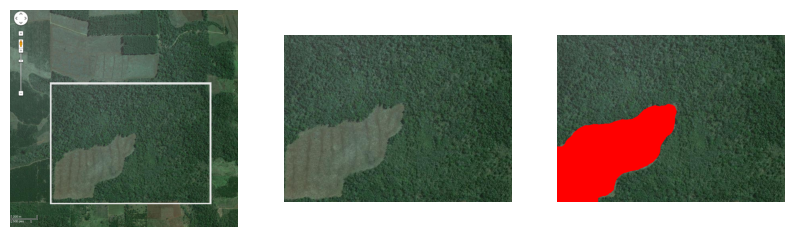

In [23]:
bosque = cv.imread('/content/drive/My Drive/PDI/Deforestacion.png')
bosque_ROI = bosque[280:700,160:730]                          # Obtenemos sólo la parte a trabajar, la que está en el recuadro
bosque_blur = cv.boxFilter(bosque_ROI,-1,(39,39))             # Blur de la imágen original para sacar la máscara. Haciéndolo con la imágen borrosa evito sacar detalles innecesarios.
deforestado_ROI = bosque_ROI[330:400,40:100]                  # Saco una ROI de cómo se ve la parte deforestada

mascara_bosque = segmentacion_rgb(bosque_blur,deforestado_ROI,24)  # Máscara de la segmentacion de color correspondiente a deforestado_ROI

bgr_bosque = np.array(cv.split(bosque_ROI))                   # Saco los 3 canales del bosquecito
bgr_bosque[2][mascara_bosque != 0] = 255                      # Llevo el canal rojo a 255 para marcar la zona de deforestación (donde la máscara es distinta de 0)
bgr_bosque[1][mascara_bosque != 0] = 0                        # El resto de canales los seteo en 0
bgr_bosque[0][mascara_bosque != 0] = 0
bosque_rojo = cv.merge(bgr_bosque)                            # Obtengo mi imágen a partir de los tres planos R,G,B.

fig,ax = plt.subplots(1,3,figsize=(10,16))
ax[0].imshow(bosque[:,:,[2,1,0]])
ax[0].axis('off')
ax[1].imshow(bosque_ROI[:,:,[2,1,0]])
ax[1].axis('off')
ax[2].imshow(bosque_rojo[:,:,[2,1,0]])
ax[2].axis('off')
plt.show()

In [24]:
H,W,_ = bosque_ROI.shape
area_total = H*W                                        # para el área total saco el área del rectángulo que saqué, ésto me da área en píxeles.
area_deforestada = np.count_nonzero(mascara_bosque)     # cuento los valores de la máscara distintos de 0 que representan sólo la parte roja
area_monte = area_total - area_deforestada              # para el área sin deforestar le resto al área total la parte que registra la máscara

print(f'Área total en píxeles: {area_total}')
print(f'Área deforestada en píxeles: {area_deforestada}')
print(f'Área monte en píxeles: {area_monte}')

Área total en píxeles: 239400
Área deforestada en píxeles: 43758
Área monte en píxeles: 195642


Como sabemos por la imágen de referencia que 100px -> 200m (esquina inferior izquierda), entonces en cada píxel tenemos 2m x 2m de área cubierta, o 4 metros cuadrados. Luego, hacemos una conversión para obtener el área en metros.

In [25]:
area_total *= 4         # tenemos 239400 píxeles y cada uno representa 4 metros cuadrados, multiplico por 4 y me da el área en metros cuadrados.
area_deforestada *= 4
area_monte = area_total - area_deforestada

print(f'Área total en métros cuadrados: {area_total}')
print(f'Área deforestada en métros cuadrados {area_deforestada}')
print(f'Área monte en métros cuadrados: {area_monte}')

Área total en métros cuadrados: 957600
Área deforestada en métros cuadrados 175032
Área monte en métros cuadrados: 782568


Además, obtenemos el porcentaje de cubrimiento del área deforestada y del área del monte respecto del área total.

In [26]:
porcentaje_deforestado = area_deforestada*100/area_total
porcentaje_monte = area_monte*100/area_total

print(f'Porcentaje deforestado: {np.round(porcentaje_deforestado,2)}%')
print(f'Porcentaje monte: {np.round(porcentaje_monte,2)}%')

Porcentaje deforestado: 18.28%
Porcentaje monte: 81.72%
